## Exercise 7-1

In [22]:
import first
import thinkstats2
import thinkplot

import numpy as np

%matplotlib inline

In [16]:
live, firsts, others = first.MakeFrames()
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])

In [17]:
ages = live.agepreg
weights = live.totalwgt_lb

C:\Python34\lib\site-packages\matplotlib\axes\_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
C:\Python34\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


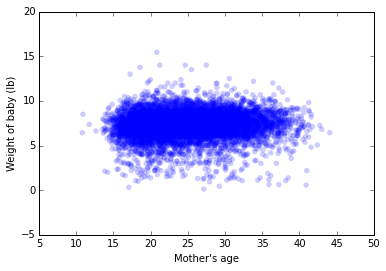

In [18]:
thinkplot.Scatter(ages, weights, alpha=0.2)
thinkplot.Show(xlabel="Mother's age",
              ylabel='Weight of baby (lb)')

It seems like there is no corrlation between the two, it might be better to show with hexbin plot

C:\Python34\lib\site-packages\matplotlib\axes\_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


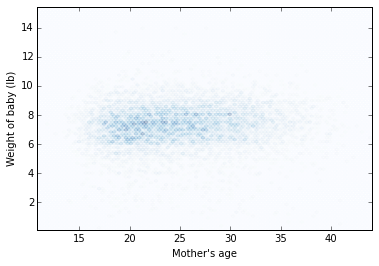

In [19]:
thinkplot.HexBin(ages, weights, alpha=0.2)
thinkplot.Show(xlabel="Mother's age",
              ylabel='Weight of baby (lb)')

In [20]:
# correlation calculations:
print("Pearson's Correlation: ", thinkstats2.Corr(live.agepreg, live.totalwgt_lb))
print("Spearman's Rank Correlation: ", thinkstats2.SpearmanCorr(live.agepreg, live.totalwgt_lb))

Pearson's Correlation:  0.0688339703541
Spearman's Rank Correlation:  0.0946100410966


Once more the correlation values above show that relation if there is any between babies weight and mother's age has an extreme weak linear relation.

Information regarding the plot below:
1. define regular values with set interval for variable bins.
2. for pregnancy age below bin value get the indices and put each in variable indices.
3. 'groups' is a dropby object that has indices and group label and followed by dataframes for each index
4. 'binnedAge' is a list of mean for each group dataframes
5. 'cdfs' is the cdf for each group in groups

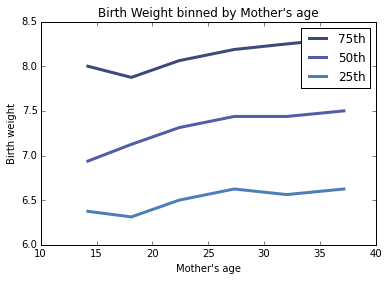

In [23]:
bins = np.arange(10,40,5)
indices = np.digitize(live.agepreg, bins)
groups = live.groupby(indices)

binnedAge = [group.agepreg.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]

for percent in [75, 50, 25]:
    binnedWeights = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(binnedAge, binnedWeights, label=label)

thinkplot.Show(xlabel="Mother's age",
              ylabel='Birth weight',
              title="Birth Weight binned by Mother's age")

From plot above there seems to be weak correlation between the babies weight and mother's age. It seems that the correlation is stronger from age 18 to 27. After which it becomes weaker.